# Refresher: Principle Components Analysis

### Bernard Evans

#### How can we use some data to know some things...


Import Import Import... Import Import Import

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the dataset

In [48]:
# What am I doing here... well, loading data... duh, but displaying head is the bit where I get my first idea of what I am looking at.
# It is important even now to be thinking... what am I trying to predict and what can I use to predict it.
# In this case... Financial Distress is the name of the game. So that is the one that really matters. Everything from x1-x83... well it would be nice to know what they mean,
# but from the perspective of data analysis, it is not always important to know what your inputs are (unless they have some kind of special quality like time)

df = pd.read_csv('Financial Distress.csv')
df.head(5)



,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [49]:
# I always like to know what I'm dealing with 
[rows, columns] = df.shape

print("Rows: ", rows, ", Columns:", columns)

Rows:  3672 , Columns: 86


### 2. Analyse and visualise the data
Usually it is a good idea to get a sense of the range and variation in our various input data/raw features.

In [50]:
# This dataset is huge, but some basic characteristics... mean, std, min, max etc will start to give some insight into the variables we are looking at and how they matter.
df.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896772,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


## Heat Maps and Correlation
I'm almost convinced now that there is too much data to use a heat map... 82 different variables. We may need to break this up. Let's start with just 7 'unknown' important things, the Financial Distress (column 4), Time, which company and... that is it. 

In [51]:
df_small = df.iloc[:, :10]

pearson_correlation = df_small.corr(method='pearson')
pearson_correlation



,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7
Company,1.000000,0.149150,0.002065,0.121329,0.006210,-0.189516,-0.032519,-0.068309,0.090986,0.131183
Time,0.149150,1.000000,0.144200,0.128917,-0.001065,-0.259707,0.068049,-0.005669,0.164152,0.133231
Financial Distress,0.002065,0.144200,1.000000,0.030928,0.272978,-0.089264,0.116837,0.274435,0.077260,0.042412
x1,0.121329,0.128917,0.030928,1.000000,0.208851,-0.440321,-0.035504,0.109543,0.535425,0.914489
x2,0.006210,-0.001065,0.272978,0.208851,1.000000,-0.504509,0.114046,0.892480,0.298078,0.214098
x3,-0.189516,-0.259707,-0.089264,-0.440321,-0.504509,1.000000,0.094481,-0.356252,-0.593620,-0.398730
x4,-0.032519,0.068049,0.116837,-0.035504,0.114046,0.094481,1.000000,0.194218,0.068274,-0.054573
x5,-0.068309,-0.005669,0.274435,0.109543,0.892480,-0.356252,0.194218,1.000000,0.236113,0.110410
x6,0.090986,0.164152,0.077260,0.535425,0.298078,-0.593620,0.068274,0.236113,1.000000,0.455435
x7,0.131183,0.133231,0.042412,0.914489,0.214098,-0.398730,-0.054573,0.110410,0.455435,1.000000


<Axes: >

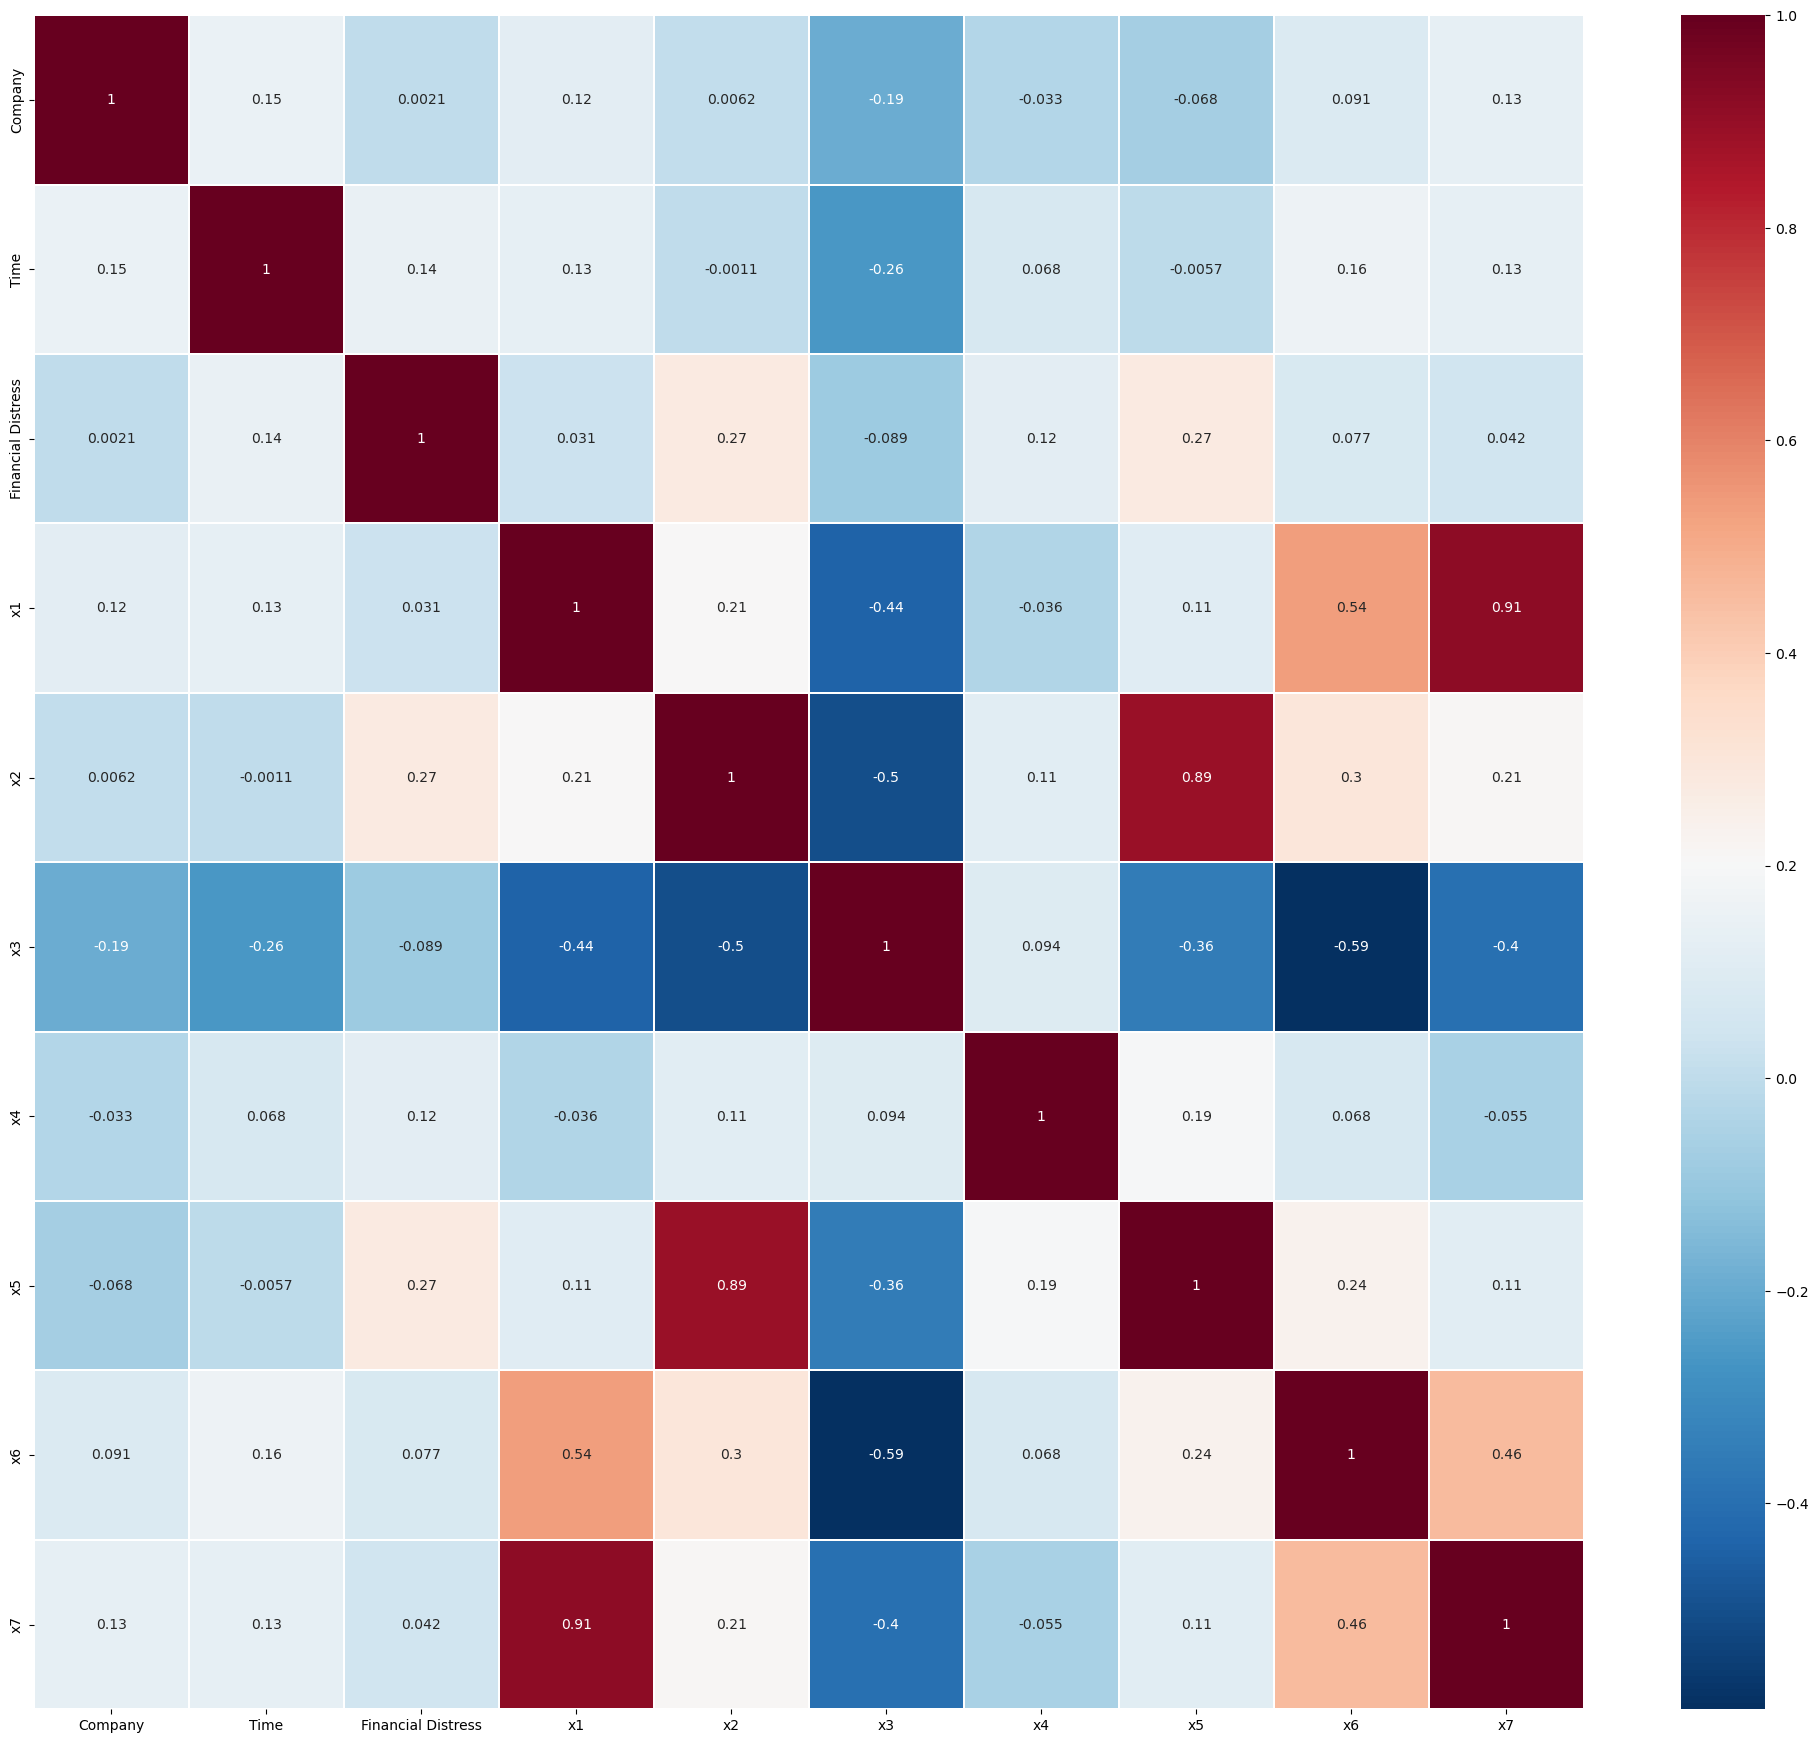

In [52]:

plt.figure(figsize=(25, 22))
sns.heatmap(pearson_correlation, cmap='RdBu_r',xticklabels=pearson_correlation.columns, yticklabels=pearson_correlation.columns, annot=True, linewidths=.07)


What to observe here? Well... Financial Distress and the 'predictor' factors are what we care about. Now, this is technically a time-series set of data, but let's pretend it isn't for the moment.

Let's just pretend we only care about correlation. What can we see? What are our biggest hits?

Company and Time are pretty lame. This is unsurprising. Company is just some arbitrary numbers which have nothing to do with Financial Distress (i.e., they aren't ordered best to worst or anything). Time is also pretty arbitrary so far because there is no context for time being important. We aren't treating this like a cyclical dataset where certain things repeat... yet.

What about x1-x7?

x2 and x5 look like some decent hits. 0.27 correlation. These values must mean something? x4... 0.12. Well... may as well look at it but not as hopefully.

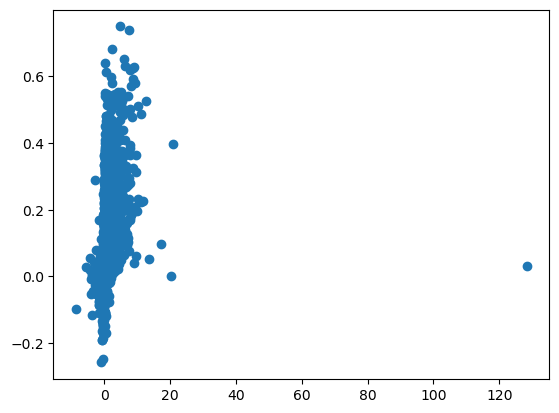

In [53]:
plt.scatter(df_small.iloc[:, 2], df_small.iloc[:, 4])


## Analysis Observations
Sheesh... that doesn't look good. Just remember, a little more time spent finagling your plots will help you understand your data better. Good axis labels, colours, axis ranges can make a huge difference.

Text(0, 0.5, 'x2')

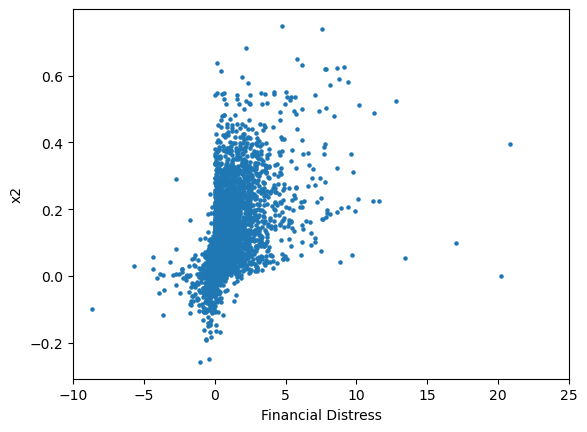

In [54]:
# Use smaller points and adjust the x-axis to exagerrate the appearance of the data.
plt.scatter(df_small.iloc[:, 2], df_small.iloc[:, 4], s=5)
plt.xlim(-10, 25)
plt.xlabel('Financial Distress')
plt.ylabel('x2')

Already here, we can see that even from this one predictor value, we can begin to have some idea of the financial distress. More x2... more financial distress.

There is definitely something else going on here though. It isn't really a straight line. At any rate x2 is definitely going into our 'pre-feature' pile.

What about x5? Well... going back to my original heat map... x5 is... 0.89 x2. These are going to be mostly the same measure.

Text(0, 0.5, 'x5')

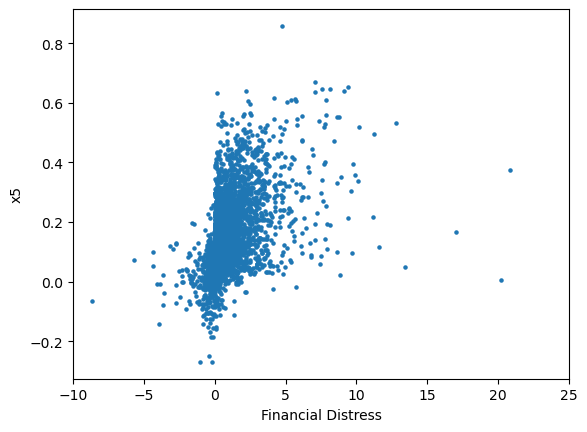

In [55]:
# Use smaller points and adjust the x-axis to exagerrate the appearance of the data.
plt.scatter(df_small.iloc[:, 2], df_small.iloc[:, 7], s=5)
plt.xlim(-10, 25)
plt.xlabel('Financial Distress')
plt.ylabel('x5')

Text(0, 0.5, 'x5')

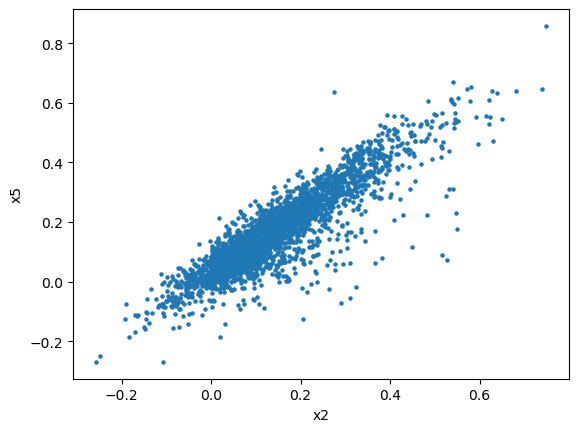

In [56]:
# Use smaller points and adjust the x-axis to exagerrate the appearance of the data.
plt.scatter(df_small.iloc[:, 4], df_small.iloc[:, 7], s=5)
plt.xlabel('x2')
plt.ylabel('x5')

If we look at x2 vs x5 we can see that they are broadly the same thing. However, there might be enough information in each to be somewhat useful. This is where... PCA might come in handy. Maybe summarising both x2 and x5 along the diagonal axis (bottom left to top right) and ignoring much of the eother diagonal axis (top left to bottom right) would basically summarise the data more effectively and leave only one column for data analysis.

In [57]:
from sklearn.decomposition import PCA

# We say we only want one component! We could ask for 2 and then drop one but why would we be doing that?
my_pca = PCA(n_components = 1)

my_joint_data = pd.concat([df_small.iloc[:, 4], df_small.iloc[:, 7]], axis=1)

# This is where the computer takes over with its lambda identity matrix nonsense
my_pca.fit(my_joint_data)

# What is this thing again? A bit opaque really...
print(my_pca)

my_joint_data_new = my_pca.transform(my_joint_data)

# Tada!
print(my_joint_data_new)

PCA(n_components=1)
[[-0.14173619]
 [-0.20734604]
 [-0.22786901]
 ...
 [ 0.08207478]
 [ 0.05095017]
 [ 0.04307249]]


# Consolidating Our Understanding
Do we stop here? No. Why? Well, in my view, if you want to understand PCA, there should be a few more things to clarify. 
#1 If our new vector is a summary of our old vector, what kind of summary is it?
#2 Will it produce a better or equivalent prediction?

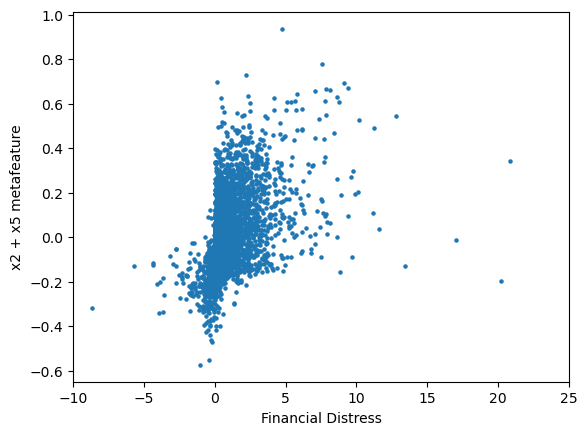

In [58]:
# Plot the original outpus vs our new meta-input
plt.scatter(df_small.iloc[:, 2], my_joint_data_new, s=5)
plt.xlim(-10, 25)
plt.xlabel('Financial Distress')
plt.ylabel('x2 + x5 metafeature')

print()

Oh dear. It doesn't look much different. That said, we weren't really expecting it to. The other things we might think about now are:
* How does it correlate (i.e., pearson correlation)
* How would a regression vs 1 variable compared to a regression vs 2 variables 'fit'

In [59]:
# Move the output, x2, x5, and the PCA meta-x2-x5 into a single matrix and redo the correlations

df_pca = pd.DataFrame(my_joint_data_new, columns=['pca_x2x5'])
df_weird = pd.concat([df.iloc[:, 2], df.iloc[:, 4], df.iloc[:, 7], df_pca], axis=1)

pearson_correlation = df_weird.corr(method='pearson')
pearson_correlation


,Financial Distress,x2,x5,pca_x2x5
Financial Distress,1.000000,0.272978,0.274435,0.281392
x2,0.272978,1.000000,0.892480,0.970360
x5,0.274435,0.892480,1.000000,0.975038
pca_x2x5,0.281392,0.970360,0.975038,1.000000


Huzzahs! This has done roughly what we might have expected. Firstly, the correlation with Financial Distress is marginally better (0.281392) than either x2(0.27...) or x5 (0.27...). Additionally, the correlation between our metric and both x2 & x5 is ~97% (which makes sense given we made it out of the two). This also indicates that we haven't really lost much by getting rid of the second of the PCAs.

In [60]:
# 2D Linear Regression time

from sklearn.linear_model import LinearRegression

train_output1 = df_weird['Financial Distress'].values
train_input1 = df_weird['pca_x2x5'].values.reshape((-1, 1))

model2 = LinearRegression().fit(train_input1, train_output1)

r2_2D = model2.score(train_input1, train_output1)

# 3D Linear Regression time

from sklearn.linear_model import LinearRegression

train_output2 = df_weird['Financial Distress'].values
train_input2 = df_weird[['x2', 'x5']].values

model3 = LinearRegression().fit(train_input2, train_output2)


r2_3D = model3.score(train_input2, train_output2)

print('2D Score: ', r2_2D)
print('3D Score: ', r2_3D)

2D Score:  0.0791814634606981
3D Score:  0.07918155493365175


Now, admittedly, the R^2 of the 3D regression is marginally better. But marginally the term here. Basically we have used PCA to summarize two input data lines which are 90% correlated with one another as a single line of input (or a single 'feature').